<a href="https://colab.research.google.com/github/naomiyjiang/wisd_court_catalysts/blob/main/Foul_Violation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns


from google.colab import files
uploaded = files.upload()

Saving g0042100301.csv to g0042100301 (7).csv


In [5]:
df = pd.read_csv("g0042100301.csv")
df

,game_id,league,period,event_num,clock,description,locX,locY,opt1,opt2,event_action_type,event_type,team_id,offense_team_id,player1_id,player2_id,player3_id,home_score,away_score,order
0,42100301,NBA,1,2,12:00,Start Period,0,-80,0,0,0,12,0,0,0,NaN,NaN,0,0,20000
1,42100301,NBA,1,4,11:57,Jump Ball Williams III vs Adebayo (Williams ga...,0,-80,0,0,0,10,1610612738,1610612738,1629057,1629684.0,1628389.0,0,0,60000
2,42100301,NBA,1,7,11:39,[BOS 3-0] Williams 3pt Shot: Made (3 PTS) Assi...,205,141,3,0,80,1,1610612738,1610612738,1629684,1628369.0,NaN,0,3,70000
3,42100301,NBA,1,9,11:17,[MIA] Tucker Floating Jump shot: Missed,20,103,2,0,78,2,1610612748,1610612748,200782,NaN,NaN,0,3,90000
4,42100301,NBA,1,10,11:14,[BOS] Brown Rebound (Off:0 Def:1),20,103,0,0,0,4,1610612738,1610612748,1627759,NaN,NaN,0,3,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,42100301,NBA,4,673,00:28.1,[BOS] Pritchard 3pt Shot: Missed,-188,189,3,0,79,2,1610612738,1610612738,1630202,NaN,NaN,118,107,6580000
472,42100301,NBA,4,674,00:28.1,[MIA] Strus Rebound (Off:1 Def:3),-188,189,0,0,0,4,1610612748,1610612738,1629622,NaN,NaN,118,107,6590000
473,42100301,NBA,4,675,00:03.3,[MIA] Team Turnover : Shot Clock Turnover,120,57,0,0,11,5,1610612748,1610612748,0,NaN,NaN,118,107,6600000
474,42100301,NBA,4,676,00:00.0,End Period,0,-80,0,0,0,13,0,1610612738,0,NaN,NaN,118,107,6610000


In [6]:
foul_events = df[df['event_type'] == 6]
foul_events

,game_id,league,period,event_num,clock,description,locX,locY,opt1,opt2,event_action_type,event_type,team_id,offense_team_id,player1_id,player2_id,player3_id,home_score,away_score,order
10,42100301,NBA,1,17,10:40,[MIA] Strus Foul: Shooting (1 PF) (2 FTA) (E M...,-28,29,0,0,2,6,1610612748,1610612738,1629622,NaN,1629057.0,0,5,170000
44,42100301,NBA,1,60,07:12,[MIA] Strus Foul: Shooting (2 PF) (1 FTA) (T B...,16,10,0,0,2,6,1610612748,1610612738,1629622,NaN,1628369.0,6,14,600000
48,42100301,NBA,1,65,06:58,[MIA] Tucker Foul: Loose Ball (1 PF) (Z Zarba),213,607,0,0,3,6,1610612748,1610612738,200782,NaN,1628369.0,6,14,650000
57,42100301,NBA,1,77,05:50,[BOS] Brown Foul: Personal (1 PF) (T Brothers),0,20,0,0,1,6,1610612738,1610612748,1627759,NaN,1629639.0,9,16,760000
67,42100301,NBA,1,93,03:53,[MIA] Herro Foul: Personal (1 PF) (2 FTA) (Z Z...,-59,21,0,0,1,6,1610612748,1610612738,1629639,NaN,1628401.0,15,20,910000
89,42100301,NBA,1,129,01:29,[BOS] White Foul: Offensive Charge (1 PF) (E M...,43,26,0,0,26,6,1610612738,1610612738,1628401,NaN,1628997.0,23,23,1260000
91,42100301,NBA,1,132,01:16,[MIA] Butler Foul: Offensive Charge (1 PF) (Z ...,-23,8,0,0,26,6,1610612748,1610612748,202710,NaN,1628401.0,23,23,1290000
111,42100301,NBA,2,168,10:41,[MIA] Oladipo Foul: Personal (1 PF) (T Brothers),-62,155,0,0,1,6,1610612748,1610612738,203506,NaN,1627759.0,28,30,1630000
117,42100301,NBA,2,176,09:58,[BOS] Nesmith Foul: Personal (1 PF) (Z Zarba),-91,17,0,0,1,6,1610612738,1610612748,1630174,NaN,203506.0,28,32,1710000
118,42100301,NBA,2,178,09:49,[BOS] Williams III Foul: Shooting (1 PF) (2 FT...,-48,14,0,0,2,6,1610612738,1610612748,1629057,NaN,1628389.0,28,32,1730000


In [7]:
# Assuming you have a DataFrame called foul_events with a column named 'description'

# Extract player names from the 'description' column using regular expression
foul_events['player_name'] = foul_events['description'].str.extract(r'\] (\w+)', expand=False)

# Perform the groupby operation on 'player_name' column
grouped_data = foul_events.groupby('player_name')

# Count the number of fouls per player and sort the results in descending order
foul_counts = grouped_data.size().reset_index(name='foul_number').sort_values(by='foul_number', ascending=False)

# Reset the index of the DataFrame
foul_counts = foul_counts.reset_index(drop=True)

# Print the resulting DataFrame
print(foul_counts)


   player_name  foul_number
0     Williams            8
1      Adebayo            4
2       Tucker            4
3      Vincent            4
4        White            4
5        Brown            3
6       Butler            3
7      Nesmith            3
8      Oladipo            3
9        Strus            3
10      Dedmon            2
11   Pritchard            2
12       Theis            2
13       Herro            1
14       Tatum            1


<ipython-input-7-273f1c6ccc7e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foul_events['player_name'] = foul_events['description'].str.extract(r'\] (\w+)', expand=False)


In [8]:
foul_counts_by_group = foul_events.groupby(['period', 'event_action_type', "team_id"]).size().reset_index(name='foul_count')

In [9]:
grouped_foul_events = foul_events.groupby('team_id')
team_id_to_name = {
    1610612738: 'BOS',
    1610612748: 'MIA',
}
foul_events_count_by_team = grouped_foul_events.size().reset_index(name='foul_event_count').replace(team_id_to_name)
print(foul_events_count_by_team)

  team_id  foul_event_count
0     BOS                23
1     MIA                25


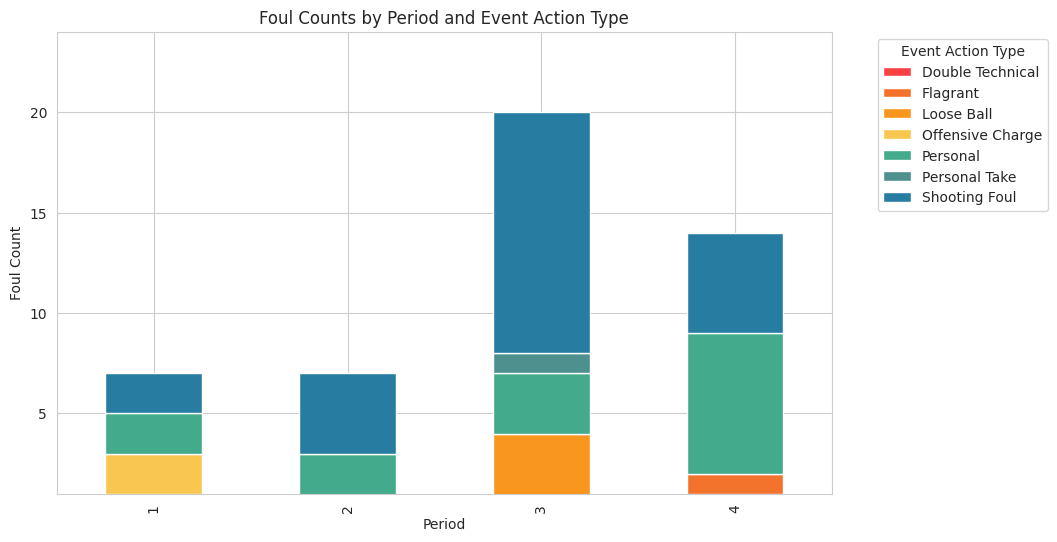

In [10]:
event_action_type_to_name = {
    1: "Personal",
    2: 'Shooting Foul',
    3: 'Loose Ball',
    14: 'Flagrant',
    16: 'Double Technical',
    26: 'Offensive Charge',
    28: 'Personal Take',
}

custom_palette = ["#f94144", "#f3722c","#f8961e","#f9c74f", "#43aa8b", "#4d908e","#277da1"]
sns.set_palette(custom_palette)
sns.set_style('whitegrid')

foul_counts = foul_events.groupby(['period', 'event_action_type']).size().reset_index(name='foul_count')

# Replace event_action_type with names
foul_counts['event_action_type'] = foul_counts['event_action_type'].replace(event_action_type_to_name)

# Pivot the data for the current team
foul_pivot = foul_counts.pivot(index='period', columns='event_action_type', values='foul_count')

# Get the maximum foul count for setting y-axis limit
max_foul_count = foul_counts['foul_count'].max()
y_axis_limit = max_foul_count * 2

# Create the stacked bar plot with y-axis limit set to 1
foul_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Period')
plt.ylabel('Foul Count')
plt.title('Foul Counts by Period and Event Action Type')
plt.legend(title='Event Action Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(1, y_axis_limit)  # Set y-axis limit to 1 and the maximum foul count

plt.show()



<ipython-input-11-bd6da094080c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foul_counts_bos['event_action_type'] = foul_counts_bos['event_action_type'].replace(event_action_type_to_name)


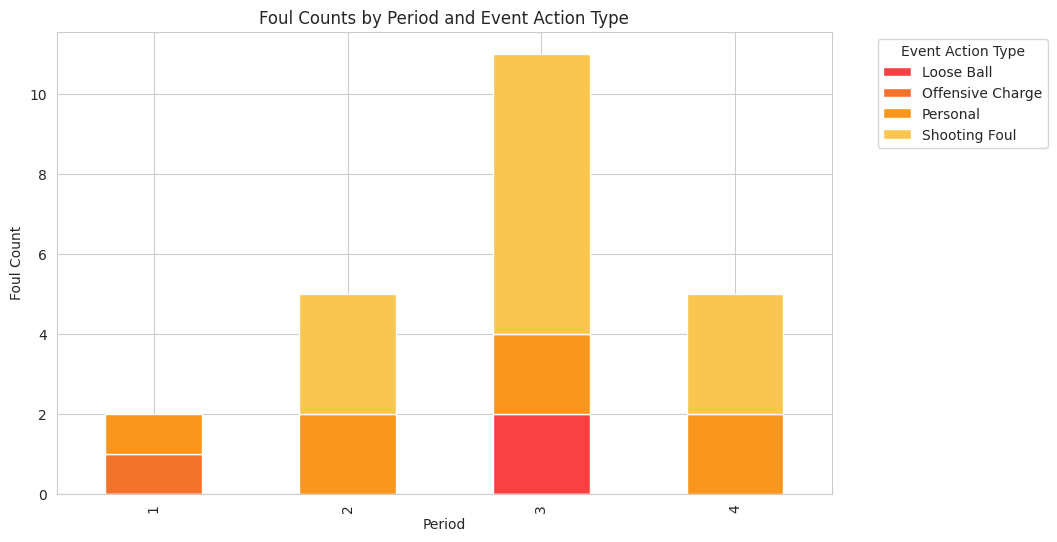

In [11]:
foul_events_bos = foul_counts_by_group['team_id'] == 1610612738
foul_counts_bos = foul_counts_by_group[foul_events_bos]

team_id_to_name = {
    1610612738: 'BOS',
    1610612748: 'MIA',
}

foul_counts_bos['event_action_type'] = foul_counts_bos['event_action_type'].replace(event_action_type_to_name)

custom_palette = ["#f94144", "#f3722c","#f8961e","#f9c74f", "#43aa8b", "#4d908e","#277da1"]
sns.set_palette(custom_palette)
sns.set_style('whitegrid')

foul_pivot = foul_counts_bos.pivot(index='period', columns='event_action_type', values='foul_count')
foul_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Period')
plt.ylabel('Foul Count')
plt.title('Foul Counts by Period and Event Action Type')
plt.legend(title='Event Action Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-12-b60ed9819980>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['event_action_type'] = data['event_action_type'].replace(event_action_type_to_name)
<ipython-input-12-b60ed9819980>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='period', y='foul_count', hue='event_action_type', ci=None, ax=axes[i])
<ipython-input-12-b60ed9819980>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['event_action_type'] = dat

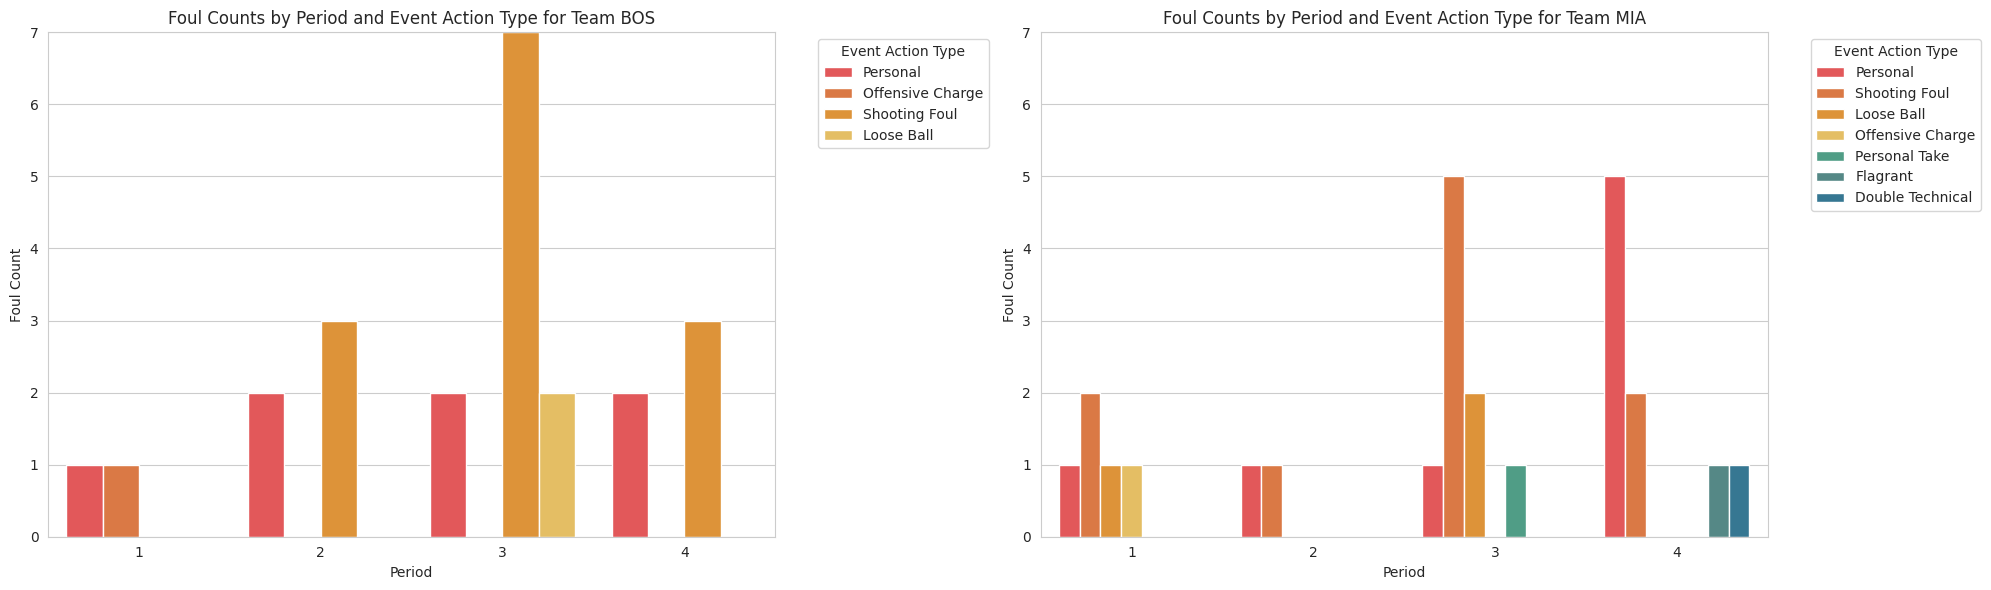

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined foul_counts_by_group

# Define the mapping of event_action_type to names
event_action_type_to_name = {
    1: "Personal",
    2: 'Shooting Foul',
    3: 'Loose Ball',
    14: 'Flagrant',
    16: 'Double Technical',
    26: 'Offensive Charge',
    28: 'Personal Take',
}

# Define the mapping of team_id to names
team_id_to_name = {
    1610612738: 'BOS',
    1610612748: 'MIA',
}

# Set the custom color palette
custom_palette = ["#f94144", "#f3722c", "#f8961e", "#f9c74f", "#43aa8b", "#4d908e", "#277da1"]
sns.set_palette(custom_palette)
sns.set_style('whitegrid')

# Group by team_id and create a combined plot for all teams
teams = foul_counts_by_group['team_id'].unique()
num_teams = len(teams)

# Create a figure with subplots for each team
fig, axes = plt.subplots(nrows=1, ncols=num_teams, figsize=(10*num_teams, 6))

# Find the maximum foul count among all dataframes for y-axis limit
max_foul_count = foul_counts_by_group['foul_count'].max()

for i, team in enumerate(teams):
    data = foul_counts_by_group[foul_counts_by_group['team_id'] == team]

    # Replace event_action_type with names
    data['event_action_type'] = data['event_action_type'].replace(event_action_type_to_name)

    # Pivot the data for the current team
    foul_pivot = data.pivot(index='period', columns='event_action_type', values='foul_count')

    # Create a stacked bar plot for the current team on its corresponding subplot
    sns.barplot(data=data, x='period', y='foul_count', hue='event_action_type', ci=None, ax=axes[i])
    axes[i].set_xlabel('Period')
    axes[i].set_ylabel('Foul Count')
    axes[i].set_title(f'Foul Counts by Period and Event Action Type for Team {team_id_to_name[team]}')
    axes[i].legend(title='Event Action Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Set the same y-axis limit for all subplots
    axes[i].set_ylim(0, max_foul_count)

# Adjust layout and spacing between subplots
plt.tight_layout()

plt.show()


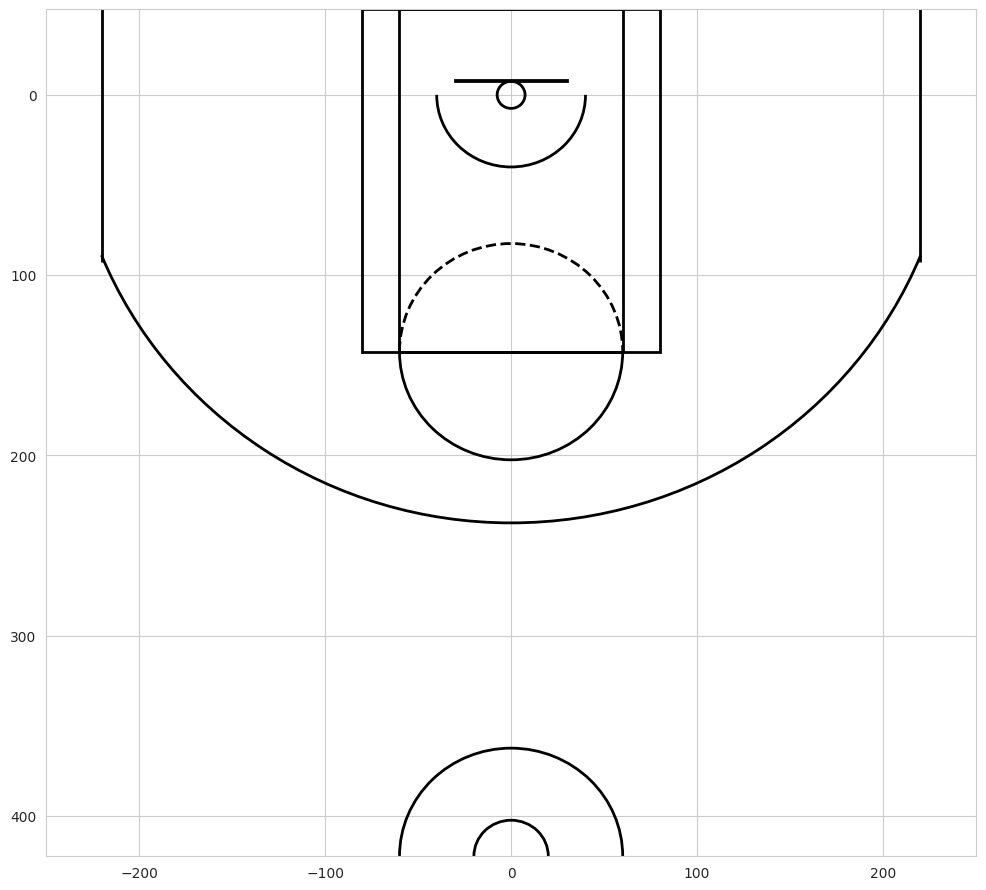

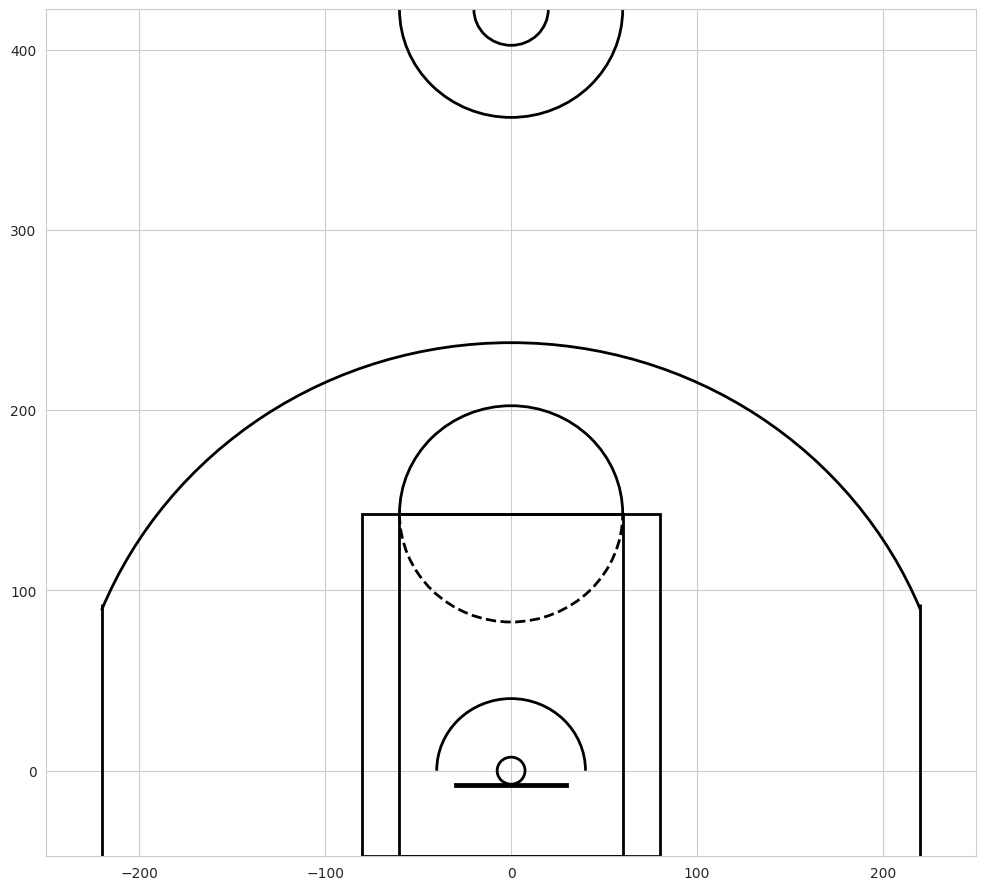

In [13]:
#http://savvastjortjoglou.com/nba-shot-sharts.html


from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


plt.figure(figsize=(12,11))
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()


plt.figure(figsize=(12,11))
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(-47.5,422.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.show()



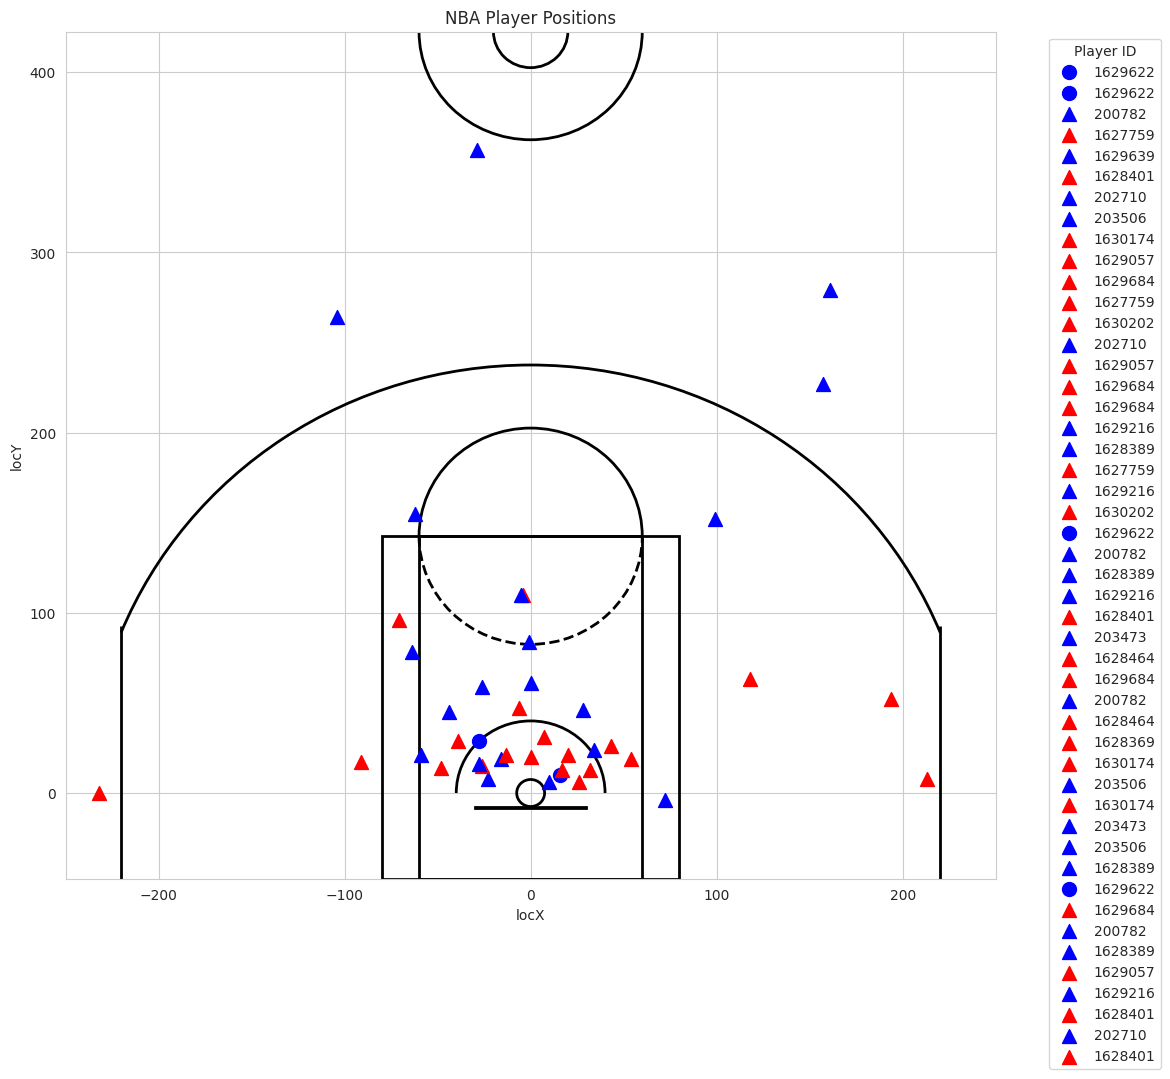

In [17]:
def plot_player_positions(player_data):
    plt.figure(figsize=(12, 11))
    draw_court()

    # Plot player positions
    for index, player_info in player_data.iterrows():
        locX = player_info['locX']
        locY = player_info['locY']
        team_id = player_info['team_id']
        player_id = player_info['player1_id']  # Assuming player1_id contains unique player identifiers

        # Differentiate players from different teams using colors
        color = 'red' if team_id == 1610612738 else 'blue'  # Change team_id accordingly

        # Use a unique marker for each player
        marker = 'o' if player_id == 1629622 else '^'  # Change player_id accordingly

        plt.scatter(locX, locY, color=color, marker=marker, s=100, label=player_id)

    plt.xlim(-250, 250)
    plt.ylim(-47.5, 422.5)

    # Add legends and labels
    plt.legend(title='Player ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('NBA Player Positions')
    plt.xlabel('locX')
    plt.ylabel('locY')

    plt.show()

plot_player_positions(foul_events)


 #https://www.kaggle.com/code/manuelkessel/nba-shot-analysis/notebook
  #http://savvastjortjoglou.com/nba-shot-sharts.html
